# Lead Score Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

The aim of this model is to identify the most promising leads based on various factors and increase the conversion rate to 80%

We will build a logistic regression model to assign a lead score between 1 to 100 to each of the leads which can be used by the company to target potential leads.

## Step 1. Importing the data

In [1]:
# Import required libraries and supress warnings
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# for train-test split
from sklearn.model_selection import train_test_split

# for scaling the train data
from sklearn.preprocessing import StandardScaler

# for creation and running the model
import statsmodels.api as sm

# Feature Selection using RFE

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Importing the dataset
leads = pd.read_csv(r'C:\Users\Raj Nimesh\Desktop\Data_Science\Module 2 - Machine Learning\Lead Scoring Case Study\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')

## Step 2. Inspecting the Dataframe

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the dimesions of the dataframe
leads.shape

(9240, 37)

In [5]:
# Checking type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 3. Exploratory Data Analysis

#### There are several columns such as 'whether the customer had seen the ad in any of the listed items' and 'index and score assigned to each customer' that can be used for other purposes but not for our modelling purpose. Hence we drop these columns

In [6]:
drop_cols = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Tags', 
             'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
            'Asymmetrique Profile Score']
leads.drop(labels = drop_cols, axis = 1, inplace = True)

In [7]:
leads.shape

(9240, 24)

In [8]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,What matters most to you in choosing a course,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Unemployed,Better Career Prospects,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Unemployed,Better Career Prospects,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Student,Better Career Prospects,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Unemployed,Better Career Prospects,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Unemployed,Better Career Prospects,No,No,No,No,Mumbai,No,No,Modified


In [10]:
# Checking for null values
null_col = (leads.isna().sum())
print(null_col)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Through Recommendations                             0
Receive More Updates About Our Courses              0
Update me on Supply Chain Co

#### Comments - While country and city are important factors but have too many Null values and cannot be imputed, hence we drop these columns. The null values in 'Total Visits' and 'Page Views Per Visit' can be imputed with the average values and and 'Last Avtivity' and 'Specilization' can be imputed wiht the Mode of the respective columns. Other columns with high missing values will be dropped

In [11]:
drop_cols_2 = ['Country', 'City', 'How did you hear about X Education', 
               'What is your current occupation', 'What matters most to you in choosing a course']
leads.drop(labels = drop_cols_2, axis = 1, inplace = True)

In [12]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,No,No,No,No,No,No,Modified


In [13]:
leads[leads.Specialization == 'Select'].shape[0]

1942

#### There are 1942 values in Specialization as "Select" which probably are values that leads did not select from dropdown and also there are 1438 Null values making a total of 3380 Null values in "Specialziation", whihc is almost 30% of the values, hence it will be good to drop this column

In [14]:
leads.drop(labels = 'Specialization', axis = 1, inplace = True)

In [15]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,Modified


In [16]:
# Imputing the Null values in remaining columns
leads['TotalVisits'] = leads['TotalVisits'].fillna(leads['TotalVisits'].mean())

In [17]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

In [18]:
# Imputing the Page Views Per Visit
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mean())

In [19]:
# Imputing 'Last Activity' with Mode
leads['Last Activity'] = leads['Last Activity'].fillna(leads['Last Activity'].mode()[0])

In [20]:
# Checking the value counts again
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

In [21]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,Modified


## Step 4. Data Preparation

We will not work with the final data after imputation to design the model

#### Converting binary variables (yes/no) to 0/1

In [22]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview' ]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [23]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,Modified


#### As we notice, the binary values have been correctly mapped to 0/1. The categorical variables with multiple levels will be mapped with dummy variables and first one will be dropped

In [24]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [25]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


#### Dropping the repeated variables

In [26]:
# We have created the dummy varibales for categorical vairables, hence we will drop the original columns
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'],1)

In [27]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 69 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Prospect ID                                         9240 non-null   object 
 1   Lead Number                                         9240 non-null   int64  
 2   Do Not Email                                        9240 non-null   int64  
 3   Do Not Call                                         9240 non-null   int64  
 4   Converted                                           9240 non-null   int64  
 5   TotalVisits                                         9240 non-null   float64
 6   Total Time Spent on Website                         9240 non-null   int64  
 7   Page Views Per Visit                                9240 non-null   float64
 8   Through Recommendations                             9240 non-null   int64  
 9

In [28]:
# We can drop lead number as it has no relevance
leads = leads.drop('Lead Number',1)

#### As the unwanted columns have been dropped and columns are in right data type formats, we will now check for outliers

In [29]:
# Checking for outliers at 25%, 50%, 75%, 90%, 95% and 99% for numerical columns
num_cols = leads[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']]
num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.445238,487.698268,2.362820
std,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


#### As we see from the data above, there are clearly some outliers that needs to be removed. For example, while the 99% values in TotalVisits are below 17, the max value is 251 which is much higher. Same goes for all other columns. Basis the data in the table, it will be good to keep values till 99 perciltile.

In [30]:
q = leads['TotalVisits'].quantile(0.99)
leads = leads[leads.TotalVisits < q]

p = leads['Total Time Spent on Website'].quantile(0.99)
leads = leads[leads['Total Time Spent on Website'] < p]

r = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit']< r]

In [31]:
num_cols = leads[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']]
num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8938.000000,8938.000000,8938.000000
mean,3.079237,468.100358,2.223131
std,2.795904,529.317588,1.823691
min,0.000000,0.000000,0.000000
25%,1.000000,5.000000,1.000000
50%,3.000000,239.000000,2.000000
75%,4.000000,898.000000,3.000000
90%,7.000000,1348.000000,5.000000
95%,8.000000,1520.000000,6.000000
99%,13.000000,1734.630000,7.000000


#### The dataset is now ready to build the model

## Step 5. Building the model

### Test-Train Split

In [32]:
# Putting feature variable to X
X = leads.drop(['Prospect ID','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [34]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 6. Feature Scaling

In [35]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1046,0,0,-1.094209,-0.880590,-1.209460,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8738,0,0,-0.034929,0.685825,0.422193,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7818,0,0,-0.034929,1.550381,-0.393633,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
498,0,0,0.318165,-0.470068,0.966078,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2169,0,0,2.436727,0.797442,-0.431705,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
### Checking the Conversion Rate
leads_converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
print(leads_converted)

38.20765271872902


#### As we notice, the conversion rate is approximately 38%

## Step 7. Looking at Correlations

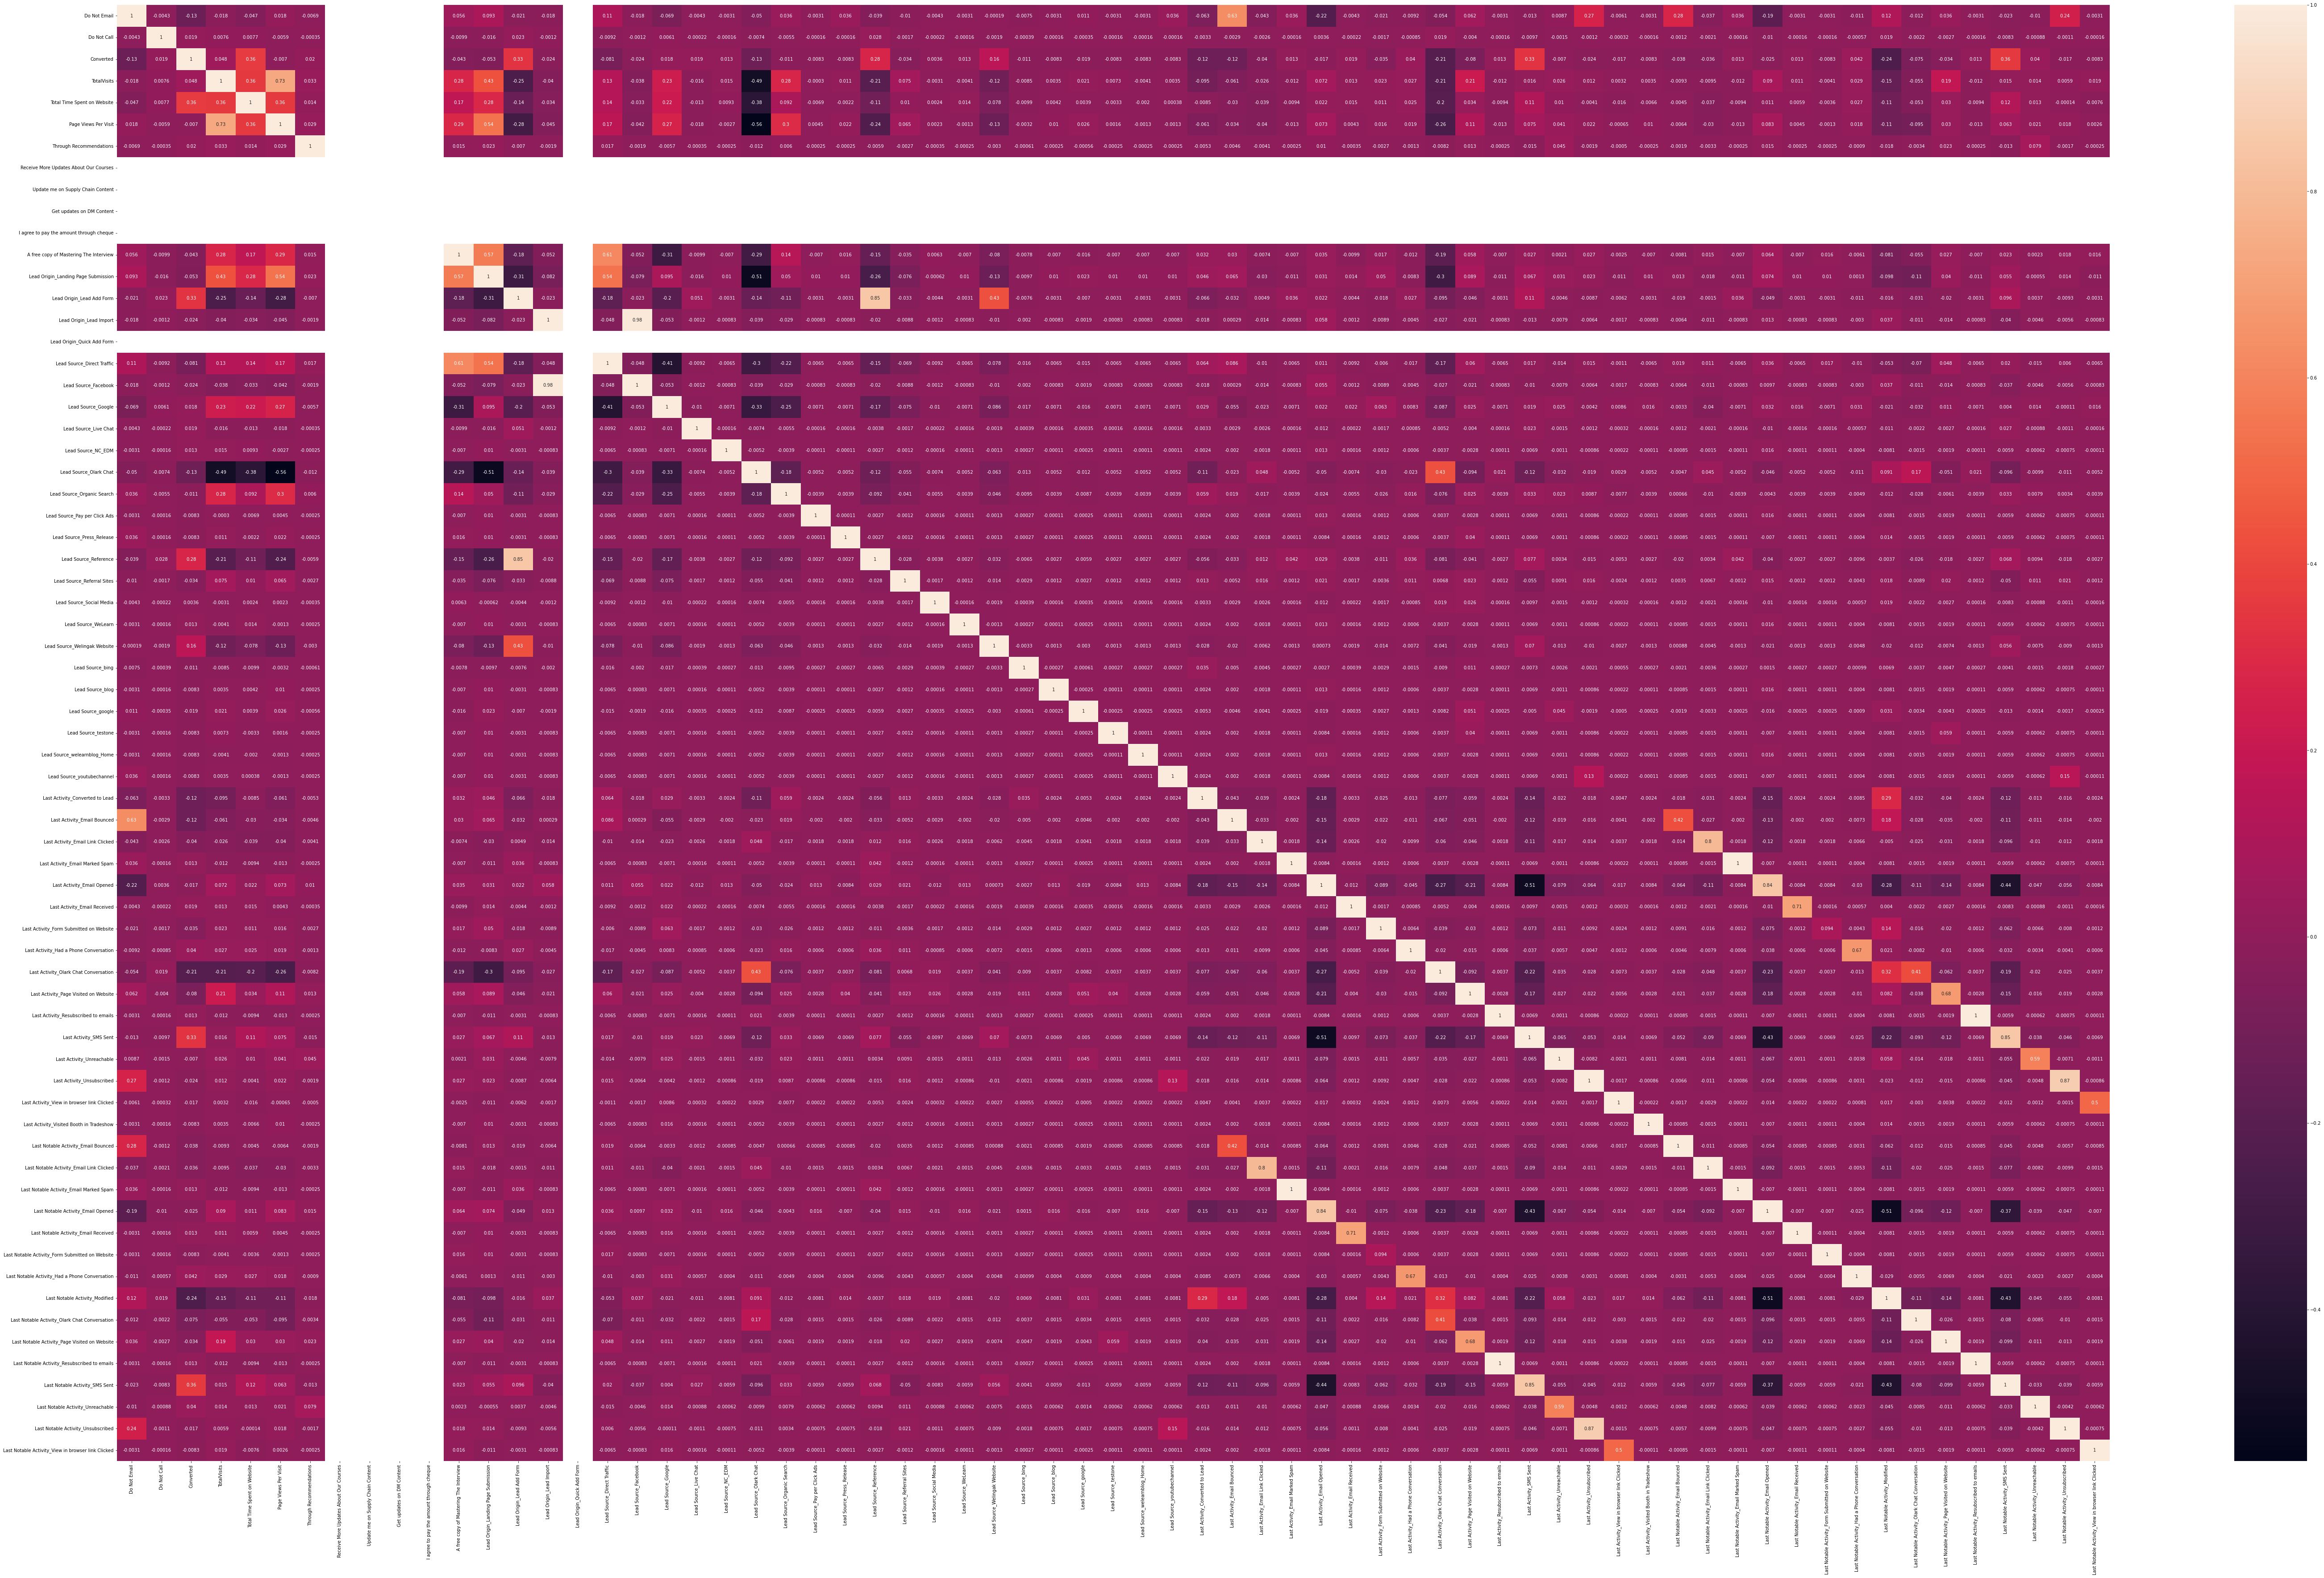

In [37]:
# Building the correlation Metrix
plt.figure(figsize = (100,60))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

#### We notice that the bottom right corner of the metrix has lot of features whihc seem to be highly correlated. Hence we will drop these features. These cover all the dummy variables with created for "Last Seen"

In [38]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8938 entries, 0 to 9239
Data columns (total 68 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Prospect ID                                         8938 non-null   object 
 1   Do Not Email                                        8938 non-null   int64  
 2   Do Not Call                                         8938 non-null   int64  
 3   Converted                                           8938 non-null   int64  
 4   TotalVisits                                         8938 non-null   float64
 5   Total Time Spent on Website                         8938 non-null   int64  
 6   Page Views Per Visit                                8938 non-null   float64
 7   Through Recommendations                             8938 non-null   int64  
 8   Receive More Updates About Our Courses              8938 non-null   int64  
 9

In [39]:
X_test = X_test.drop(['Last Activity_Converted to Lead','Last Activity_Email Bounced','Last Activity_Email Link Clicked',
                      'Last Activity_Email Marked Spam','Last Activity_Email Opened','Last Activity_Email Received',
                      'Last Activity_Form Submitted on Website','Last Activity_Had a Phone Conversation',
                      'Last Activity_Olark Chat Conversation','Last Activity_Page Visited on Website',
                      'Last Activity_Resubscribed to emails','Last Activity_SMS Sent','Last Activity_Unreachable',
                      'Last Activity_Unsubscribed','Last Activity_View in browser link Clicked',
                      'Last Activity_Visited Booth in Tradeshow','Last Notable Activity_Email Bounced',
                      'Last Notable Activity_Email Link Clicked','Last Notable Activity_Email Marked Spam',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Email Received',
                      'Last Notable Activity_Form Submitted on Website','Last Notable Activity_Had a Phone Conversation',
                      'Last Notable Activity_Modified','Last Notable Activity_Olark Chat Conversation',
                      'Last Notable Activity_Page Visited on Website','Last Notable Activity_Resubscribed to emails',
                      'Last Notable Activity_SMS Sent','Last Notable Activity_Unreachable','Last Notable Activity_Unsubscribed',
                      'Last Notable Activity_View in browser link Clicked'],1)

X_train = X_train.drop(['Last Activity_Converted to Lead','Last Activity_Email Bounced','Last Activity_Email Link Clicked',
                      'Last Activity_Email Marked Spam','Last Activity_Email Opened','Last Activity_Email Received',
                      'Last Activity_Form Submitted on Website','Last Activity_Had a Phone Conversation',
                      'Last Activity_Olark Chat Conversation','Last Activity_Page Visited on Website',
                      'Last Activity_Resubscribed to emails','Last Activity_SMS Sent','Last Activity_Unreachable',
                      'Last Activity_Unsubscribed','Last Activity_View in browser link Clicked',
                      'Last Activity_Visited Booth in Tradeshow','Last Notable Activity_Email Bounced',
                      'Last Notable Activity_Email Link Clicked','Last Notable Activity_Email Marked Spam',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Email Received',
                      'Last Notable Activity_Form Submitted on Website','Last Notable Activity_Had a Phone Conversation',
                      'Last Notable Activity_Modified','Last Notable Activity_Olark Chat Conversation',
                      'Last Notable Activity_Page Visited on Website','Last Notable Activity_Resubscribed to emails',
                      'Last Notable Activity_SMS Sent','Last Notable Activity_Unreachable','Last Notable Activity_Unsubscribed',
                      'Last Notable Activity_View in browser link Clicked'], 1)

#### Checking the correlation metrix again

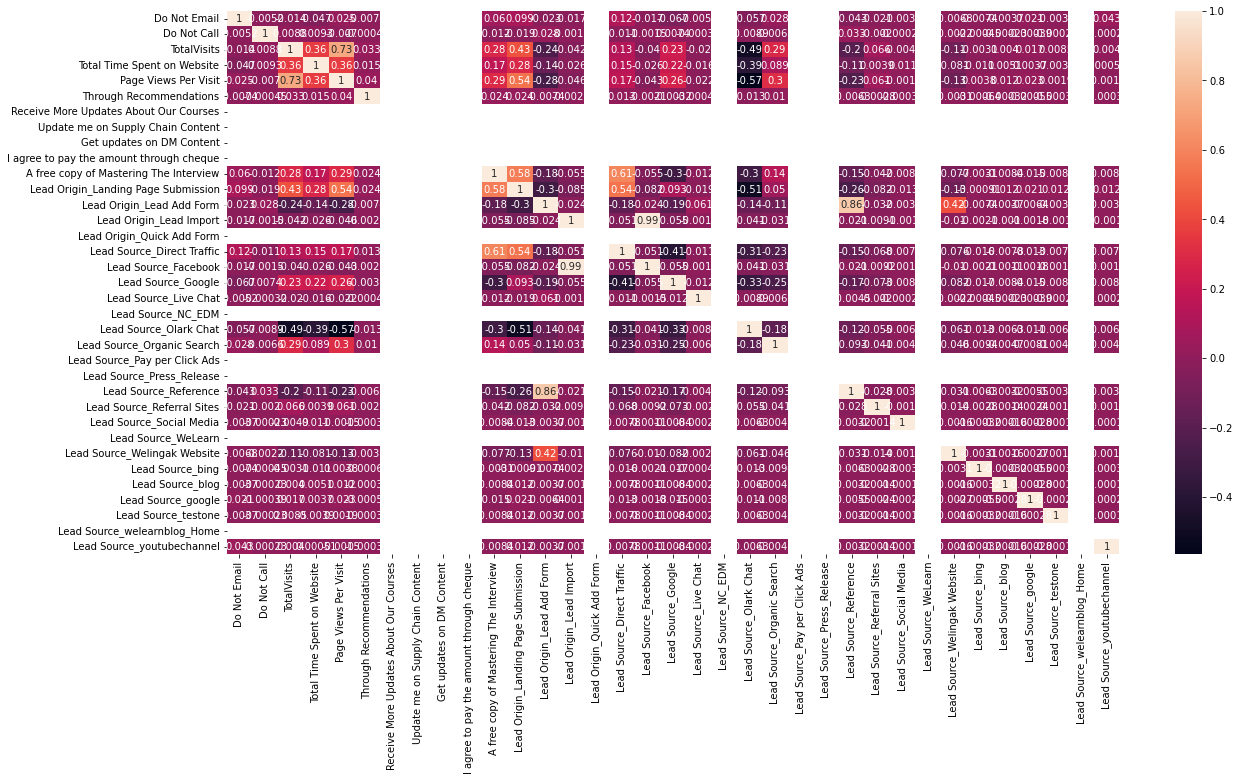

In [40]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

#### Since all the columns without any correlation only have 0 values we will drop these columns from both train and test data

In [41]:
X_test = X_test.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content',
                     'I agree to pay the amount through cheque', 'Lead Origin_Lead Add Form','Lead Source_NC_EDM',
                     'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release','Lead Source_WeLearn', 
                      'Lead Source_welearnblog_Home' ],1)

X_train = X_train.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content',
                     'I agree to pay the amount through cheque', 'Lead Origin_Lead Add Form','Lead Source_NC_EDM',
                     'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release','Lead Source_WeLearn', 
                      'Lead Source_welearnblog_Home' ],1)


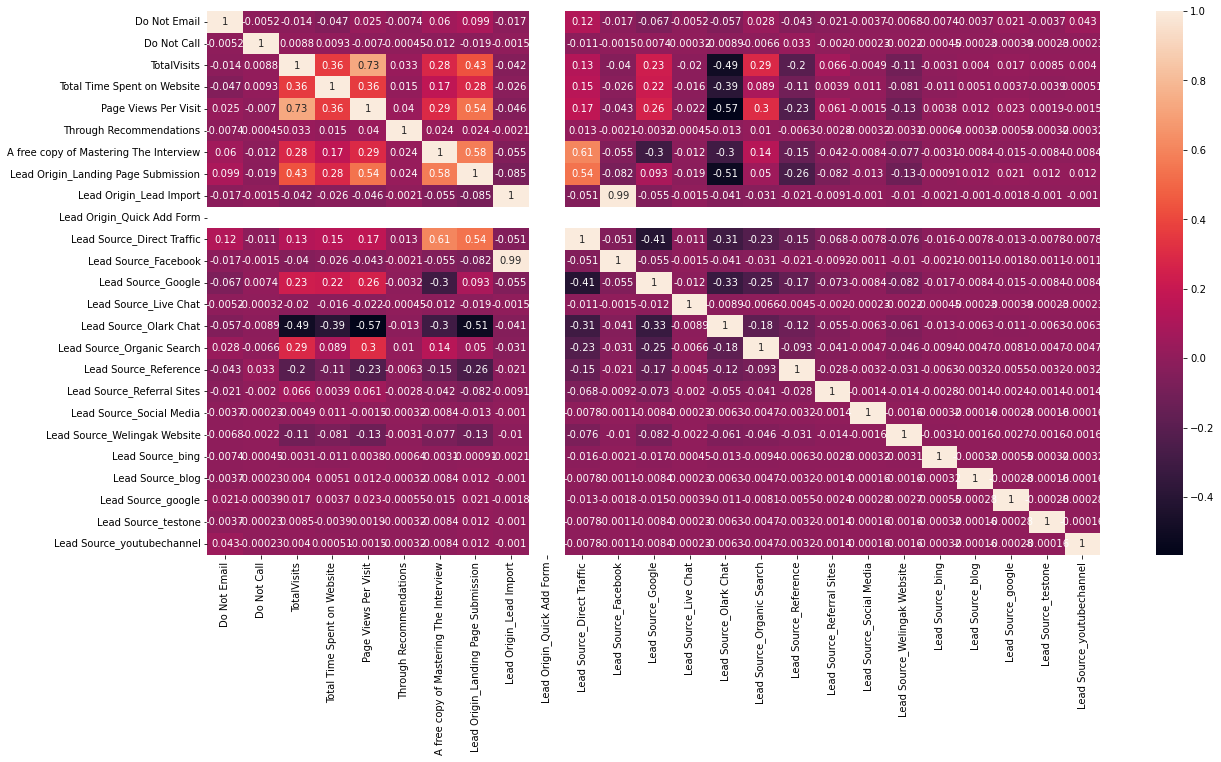

In [42]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [43]:
X_test = X_test.drop(['Lead Origin_Quick Add Form'],1)

X_train = X_train.drop(['Lead Origin_Quick Add Form' ],1)


## Step 8. Model building

#### Running the First Training Model

In [44]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6256
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3078.3
Date:                Sun, 27 Nov 2022   Deviance:                       6156.5
Time:                        10:28:55   Pearson chi2:                 6.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2902
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      2.9098      0.538      5.404      0.000       1.854       3.965
Do Not Email                              -1.3290      0.157     -8.485      0.000      -1.636      -1.022
Do Not Call                               20.6751   3.39e+04      0.001      1.000   -6.64e+04    6.64e+04
TotalVisits                                0.2054      0.046      4.471      0.000       0.115       0.295
Total Time Spent on Website                1.1433      0.038     30.473      0.000       1.070       1.217
Page Views Per Visit                      -0.0575      0.052     -1.104      0.269      -0.160       0.045
Through Recommendations                    1.8026      1.318      1.367      0.172      -0.781       4.387
A free copy of Mastering The Interview    -0.0609      0.098     -0.624      0.533      -0.252       0.130
Lead Origin_Landing Page Submission        0.0828      0.098      0.847      0.397      -0.109       0.274
Lead Origin_Lead Import                   21.5921   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Direct Traffic                -4.0330      0.549     -7.347      0.000      -5.109      -2.957
Lead Source_Facebook                     -25.4008   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_Google                        -3.8524      0.545     -7.072      0.000      -4.920      -2.785
Lead Source_Live Chat                     20.8182   3.41e+04      0.001      1.000   -6.68e+04    6.68e+04
Lead Source_Olark Chat                    -2.9457      0.539     -5.461      0.000      -4.003      -1.889
Lead Source_Organic Search                -3.9028      0.551     -7.086      0.000      -4.982      -2.823
Lead Source_Reference                      0.4122      0.565      0.730      0.466      -0.695       1.520
Lead Source_Referral Sites                -4.5652      0.628     -7.268      0.000      -5.796      -3.334
Lead Source_Social Media                  18.6983   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Welingak Website               2.8369      1.139      2.490      0.013       0.604       5.070
Lead Source_bing                          -3.5501      1.284     -2.765      0.006      -6.067      -1.033
Lead Source_blog                         -26.0259   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_google                       -25.8757   2.37e+04     -0.001      0.999   -4.65e+04    4.65e+04
Lead Source_testone                      -25.3386   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_youtubechannel               -24.3485   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
=======================================================================================

#### There are quite a few values with higher P-values and we will take the help of Recursive Feature Elimination (RFE) to select the features

In [45]:
logreg = LogisticRegression()

In [46]:
rfe = RFE(logreg,n_features_to_select = 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [47]:
rfe.support_

array([ True, False, False,  True, False,  True, False, False,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False])

In [48]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 5),
 ('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Through Recommendations', True, 1),
 ('A free copy of Mastering The Interview', False, 9),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 7),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', True, 1),
 ('Lead Source_blog', True, 1),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 3),
 ('Lead Source_youtubechannel', False, 4)]

In [49]:
col = X_train.columns[rfe.support_]

In [50]:
# List of features eliminated by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Live Chat',
       'Lead Source_Social Media', 'Lead Source_testone',
       'Lead Source_youtubechannel'],
      dtype='object')

#### Assessing the model with StatsModels

In [51]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6256
Model:                            GLM   Df Residuals:                     6240
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3094.4
Date:                Sun, 27 Nov 2022   Deviance:                       6188.8
Time:                        10:28:55   Pearson chi2:                 6.47e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2865
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            2.4784      0.468      5.293      0.000       1.561       3.396
Do Not Email                    -1.3496      0.155     -8.683      0.000      -1.654      -1.045
Total Time Spent on Website      1.1522      0.037     30.846      0.000       1.079       1.225
Through Recommendations          1.9340      1.321      1.464      0.143      -0.655       4.523
Lead Origin_Lead Import         20.4468   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Direct Traffic      -3.5361      0.472     -7.492      0.000      -4.461      -2.611
Lead Source_Facebook           -23.8756   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Google              -3.3293      0.472     -7.055      0.000      -4.254      -2.404
Lead Source_Olark Chat          -2.6465      0.472     -5.611      0.000      -3.571      -1.722
Lead Source_Organic Search      -3.3392      0.476     -7.013      0.000      -4.272      -2.406
Lead Source_Reference            0.7106      0.501      1.419      0.156      -0.271       1.692
Lead Source_Referral Sites      -4.0296      0.566     -7.124      0.000      -5.138      -2.921
Lead Source_Welingak Website     3.1300      1.109      2.822      0.005       0.956       5.304
Lead Source_bing                -3.1196      1.254     -2.487      0.013      -5.578      -0.661
Lead Source_blog               -24.5055   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Lead Source_google             -24.1928   1.46e+04     -0.002      0.999   -2.87e+04    2.86e+04
================================================================================================
"""

In [52]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1046    0.989987
8738    0.482354
7818    0.834552
498     0.168074
2169    0.465332
6131    0.168030
4590    0.200740
6939    0.804023
985     0.739056
5595    0.255055
dtype: float64

In [53]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98998683, 0.48235439, 0.83455247, 0.16807438, 0.46533226,
       0.16803009, 0.20073985, 0.80402268, 0.73905611, 0.2550546 ])

#### Creating a dataframe with the actual 'Converted' flag and the predicted probabilities

In [54]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect_ID'] = y_train.index
y_train_pred_final['Lead_Score'] = round((y_train_pred_final['Convert_Prob']*100),0)
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect_ID,Lead_Score
0,1,0.989987,1046,99.0
1,0,0.482354,8738,48.0
2,1,0.834552,7818,83.0
3,0,0.168074,498,17.0
4,0,0.465332,2169,47.0


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [55]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect_ID,Lead_Score,predicted
0,1,0.989987,1046,99.0,1
1,0,0.482354,8738,48.0,0
2,1,0.834552,7818,83.0,1
3,0,0.168074,498,17.0,0
4,0,0.465332,2169,47.0,0


In [56]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3422  465]
 [ 911 1458]]


In [57]:
# Predicted     not_converted    Converted
# Actual
# not_converted        3422      465
# Converted            911       1458  

In [58]:
# Checking the overall accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7800511508951407


#### As we notice, the prediction probabilty of the model is 78%. We will not check the VIFs to further improve the accuracy of the model

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Import,43.00
5,Lead Source_Facebook,43.00
1,Total Time Spent on Website,1.25
7,Lead Source_Olark Chat,1.15
0,Do Not Email,1.11
4,Lead Source_Direct Traffic,1.09
6,Lead Source_Google,1.06
8,Lead Source_Organic Search,1.03
9,Lead Source_Reference,1.01
11,Lead Source_Welingak Website,1.01


#### The featues with high VIF can be eliminated. Hence we will remove "Lead Origin_Lead Import" and Lead Source_Facebook" from the model

In [60]:
col = col.drop(['Lead Origin_Lead Import','Lead Source_Facebook'], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Through Recommendations', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google'],
      dtype='object')

#### We will now rebuild the model using remaining features

In [61]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6256
Model:                            GLM   Df Residuals:                     6242
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3113.0
Date:                Sun, 27 Nov 2022   Deviance:                       6226.0
Time:                        10:28:55   Pearson chi2:                 6.48e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2822
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.4912      0.263      1.871      0.061      -0.023       1.006
Do Not Email                    -1.2560      0.151     -8.296      0.000      -1.553      -0.959
Total Time Spent on Website      1.1472      0.037     30.768      0.000       1.074       1.220
Through Recommendations          1.9364      1.320      1.467      0.142      -0.651       4.524
Lead Source_Direct Traffic      -1.5530      0.271     -5.735      0.000      -2.084      -1.022
Lead Source_Google              -1.3428      0.270     -4.982      0.000      -1.871      -0.814
Lead Source_Olark Chat          -0.6651      0.270     -2.462      0.014      -1.194      -0.136
Lead Source_Organic Search      -1.3555      0.278     -4.880      0.000      -1.900      -0.811
Lead Source_Reference            2.6865      0.320      8.394      0.000       2.059       3.314
Lead Source_Referral Sites      -2.0423      0.412     -4.961      0.000      -2.849      -1.235
Lead Source_Welingak Website     5.0931      1.041      4.893      0.000       3.053       7.133
Lead Source_bing                -1.1343      1.193     -0.951      0.342      -3.472       1.204
Lead Source_blog               -22.5163   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Lead Source_google             -22.2132   1.47e+04     -0.002      0.999   -2.88e+04    2.88e+04
================================================================================================
"""

In [62]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [63]:
y_train_pred[:10]

array([0.98978906, 0.48062338, 0.83268365, 0.16782147, 0.46331452,
       0.16839177, 0.2010038 , 0.80191374, 0.73678744, 0.25427899])

In [64]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [65]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect_ID,Lead_Score,predicted
0,1,0.989789,1046,99.0,1
1,0,0.480623,8738,48.0,0
2,1,0.832684,7818,83.0,1
3,0,0.167821,498,17.0,0
4,0,0.463315,2169,47.0,0


In [66]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7774936061381074


#### Since the overall accuracy hasnt changed we will check the VIFs again

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.25
5,Lead Source_Olark Chat,1.15
0,Do Not Email,1.11
3,Lead Source_Direct Traffic,1.09
4,Lead Source_Google,1.06
6,Lead Source_Organic Search,1.03
7,Lead Source_Reference,1.01
9,Lead Source_Welingak Website,1.01
2,Through Recommendations,1.00
8,Lead Source_Referral Sites,1.00


#### As all the values have a good VIF, we will proceed with making predictions using Model 3 as our final model

In [68]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3422  465]
 [ 927 1442]]


### Understanding the confusion metrics in detail

In [69]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [70]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6086956521739131

In [71]:
# Let us calculate specificity
TN / float(TN+FP)

0.8803704656547466

In [72]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1196295343452534


In [73]:
# positive predictive value 
print (TP / float(TP+FP))

0.7561615102254851


In [74]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7868475511611864


## Step 10. Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [75]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [76]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

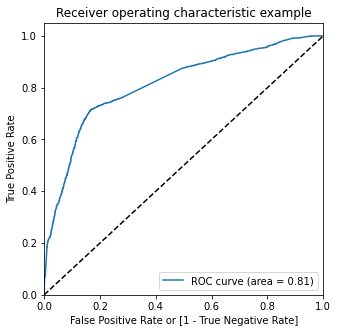

In [77]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

## Step 11. Finding the Optimal Cutoff Point

#### Optimal cutoff probability is the prob where we get balanced sensitivity and specificity

In [78]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect_ID,Lead_Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.989789,1046,99.0,1,1,1,1,1,1,1,1,1,1,1
1,0,0.480623,8738,48.0,0,1,1,1,1,1,0,0,0,0,0
2,1,0.832684,7818,83.0,1,1,1,1,1,1,1,1,1,1,0
3,0,0.167821,498,17.0,0,1,1,0,0,0,0,0,0,0,0
4,0,0.463315,2169,47.0,0,1,1,1,1,1,0,0,0,0,0


In [79]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378676  1.000000  0.000000
0.1   0.1  0.431586  0.992824  0.089529
0.2   0.2  0.600064  0.898691  0.418060
0.3   0.3  0.778133  0.729000  0.808078
0.4   0.4  0.787724  0.676657  0.855415
0.5   0.5  0.777494  0.608696  0.880370
0.6   0.6  0.756394  0.510764  0.906097
0.7   0.7  0.731458  0.393837  0.937227
0.8   0.8  0.703165  0.264669  0.970414
0.9   0.9  0.647379  0.075137  0.996141


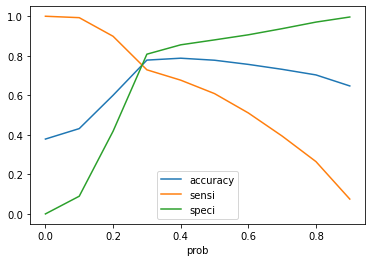

In [80]:
# Plotting the accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above curve we see that 0.25 looks to be the optimum point for cutoff probability

In [81]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,Prospect_ID,Lead_Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.989789,1046,99.0,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.480623,8738,48.0,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.832684,7818,83.0,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.167821,498,17.0,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.463315,2169,47.0,0,1,1,1,1,1,0,0,0,0,0,1


In [82]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7477621483375959

In [83]:
# Recreating the confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion2)

[[2893  994]
 [ 584 1785]]


In [84]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [85]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.753482482059941

In [86]:
# Let us calculate specificity
TN / float(TN+FP)

0.7442757910985336

In [87]:
# Calculate false postive rate - predicting converted when customer does not have churned
print(FP/ float(TN+FP))

0.2557242089014664


In [88]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6423173803526449


In [89]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8320391141788899


### Precision and Recall

#### Lets look at the confusion matrix again

In [90]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3422  465]
 [ 927 1442]]


#### Precision
TP/(TP+FP)

In [91]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7561615102254851

#### Recall
TP/(TP+FN)

In [92]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6086956521739131

## Step 12. Making predictions on the test set

In [93]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [94]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Through Recommendations,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google
871,0,-0.169271,0,0,1,0,0,0,0,0,0,0,0
6947,0,2.240890,0,1,0,0,0,0,0,0,0,0,0
8265,1,2.443313,0,0,0,0,1,0,0,0,0,0,0
3406,0,-0.880590,0,0,0,0,0,0,0,1,0,0,0
6147,0,-0.717895,0,1,0,0,0,0,0,0,0,0,0


In [95]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [96]:
y_test_pred = res.predict(X_test_sm)

In [97]:
y_test_pred[:10]

871     0.260033
6947    0.818910
8265    0.664350
3406    0.989789
6147    0.131763
1512    0.573869
937     0.493091
5486    0.234308
3244    0.361185
9168    0.696284
dtype: float64

In [98]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [99]:
# Let's see the head
y_pred_1.head()

,0
871,0.260033
6947,0.818910
8265,0.664350
3406,0.989789
6147,0.131763


In [100]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [101]:
# Putting CustID to index
y_test_df['Prospect_ID'] = y_test_df.index

In [102]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [103]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [104]:
y_pred_final.head()

,Converted,Prospect_ID,0
0,0,871,0.260033
1,1,6947,0.818910
2,1,8265,0.664350
3,1,3406,0.989789
4,1,6147,0.131763


In [105]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [106]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_ID','Converted','Convert_Prob'], axis=1)

In [107]:
y_pred_final['Lead_Score'] = round((y_pred_final['Convert_Prob']*100),0)

In [108]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect_ID,Converted,Convert_Prob,Lead_Score
0,871,0,0.260033,26.0
1,6947,1,0.818910,82.0
2,8265,1,0.664350,66.0
3,3406,1,0.989789,99.0
4,6147,1,0.131763,13.0


In [109]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [110]:
y_pred_final.head()

,Prospect_ID,Converted,Convert_Prob,Lead_Score,final_predicted
0,871,0,0.260033,26.0,0
1,6947,1,0.818910,82.0,1
2,8265,1,0.664350,66.0,1
3,3406,1,0.989789,99.0,1
4,6147,1,0.131763,13.0,0


In [111]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7803877703206562

In [112]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion2)

[[1399  237]
 [ 352  694]]


In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6634799235181644

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.8551344743276283